In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
pd.options.display.max_columns = None
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Импорт датафрейма; Exploratory Data Analysis (EDA); Extract, Load, Transform (ELT)

In [4]:
# загружаем датасет

train = pd.read_csv('C:/Users/rossi/Desktop/mfdp/source_data/train.csv')
#test = pd.read_csv('C:/Users/rossi/Desktop/MFDP/source_data/test.csv')

In [5]:
# смотрим размер

print(train.shape)
#print(test.shape)

(22083, 45)


In [13]:
# смотрим тип данных

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

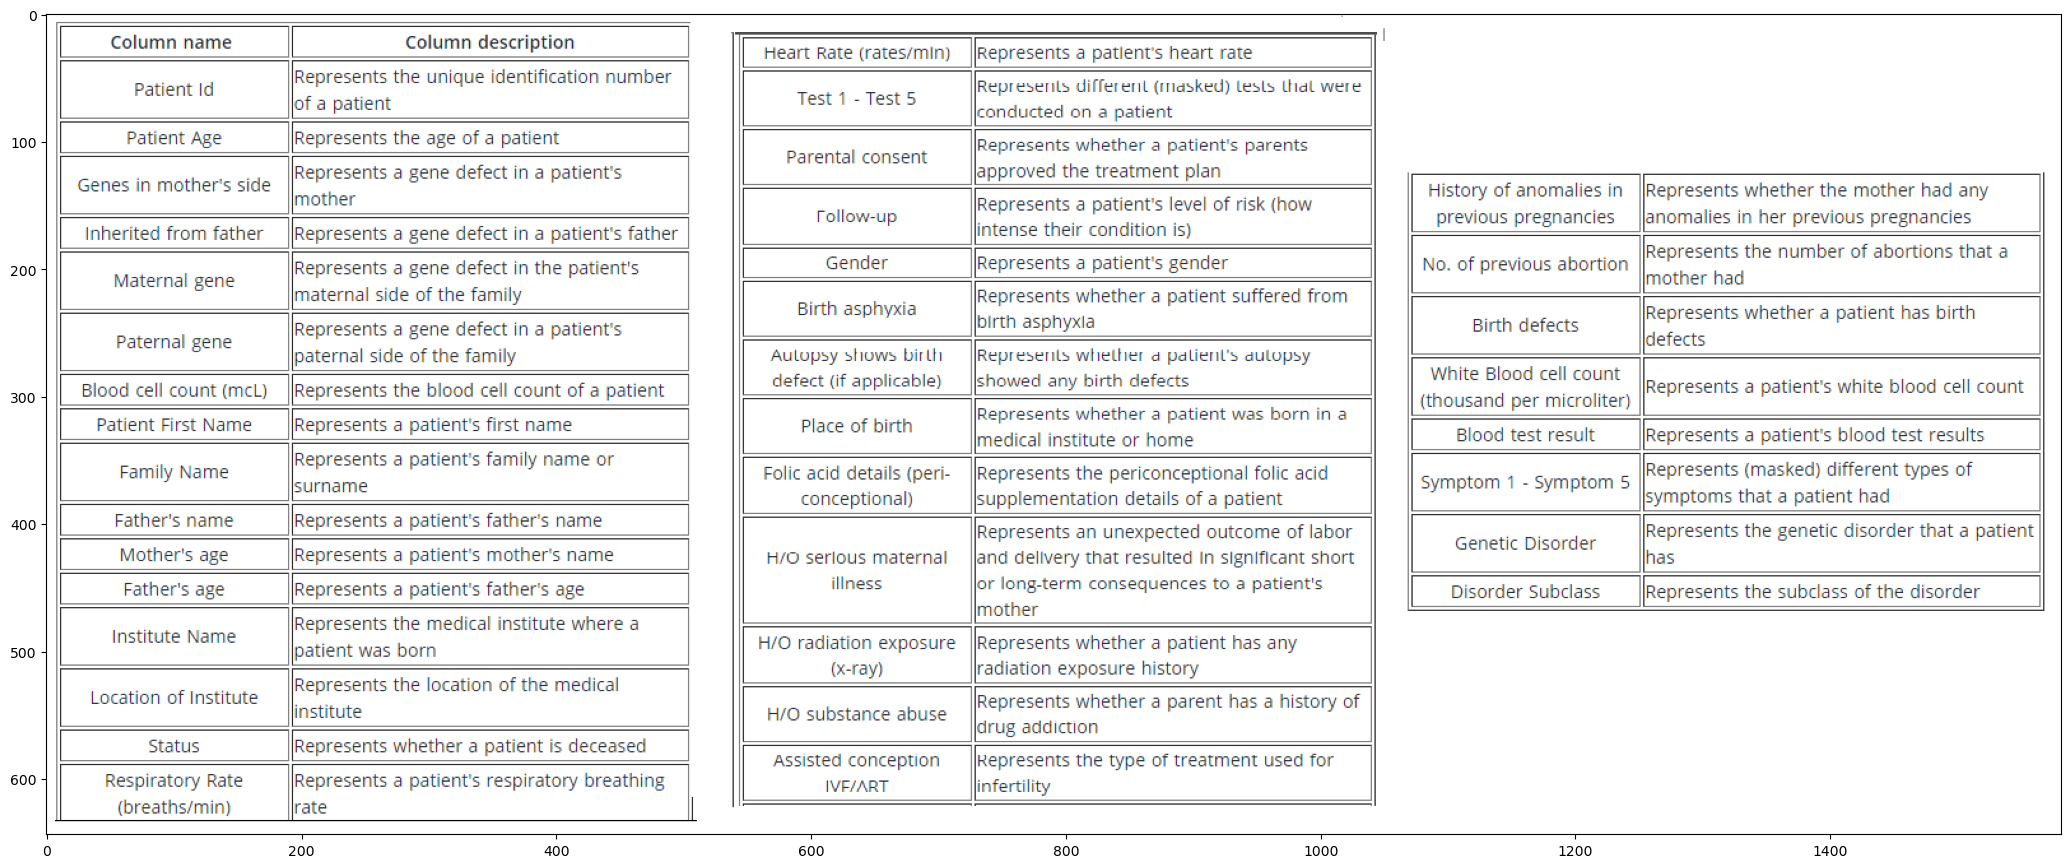

In [35]:
# загружаем инфу по переменным

pic = plt.imread('C:/Users/rossi/Desktop/genom/kaggle.png')
fig = plt.figure(figsize=(26, 24))
ax = fig.add_subplot()
ax.imshow(pic)
 plt.show()

In [18]:
# смотрим на датафрейм

train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [17]:
# смотрим статистику по датасету

train.describe(include = 'all')

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
count,22083,20656.000000,22083,21777,19273,22083,22083.000000,22083,12392,22083,16047.000000,16097.000000,16977,22083,22083,19934,19970,19956.0,19931.0,19936.0,19943.0,19913.0,19958,19917,19910,19944,21057,19959,19966,19931,19930,19888,19961,19911,19921.000000,19929,19935.000000,19938,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000,19937,19915
unique,22083,NaN,2,2,2,2,NaN,2524,6282,16368,NaN,NaN,27,26,2,2,2,NaN,NaN,NaN,NaN,NaN,1,2,3,4,4,2,2,2,4,4,2,2,NaN,2,NaN,4,NaN,NaN,NaN,NaN,NaN,3,9
top,PID0x6418,NaN,Yes,No,Yes,No,NaN,James,Smith,Clardie,NaN,NaN,Not applicable,-,Alive,Normal (30-60),Normal,NaN,NaN,NaN,NaN,NaN,Yes,Low,Ambiguous,Yes,Not applicable,Institute,Yes,No,Not applicable,-,Yes,Yes,NaN,Singular,NaN,slightly abnormal,NaN,NaN,NaN,NaN,NaN,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,NaN,13143,13133,10647,12508,NaN,420,157,6,NaN,NaN,8440,10931,11083,10065,10187,NaN,NaN,NaN,NaN,NaN,19958,10040,6695,5106,11083,10073,10087,10012,5029,5042,10012,10082,NaN,9977,NaN,5128,NaN,NaN,NaN,NaN,NaN,10202,5160
mean,NaN,6.974148,NaN,NaN,NaN,NaN,4.898871,NaN,NaN,NaN,34.526454,41.972852,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.003062,NaN,7.486224,NaN,0.592483,0.551886,0.536233,0.497747,0.461917,NaN,NaN
std,NaN,4.319475,NaN,NaN,NaN,NaN,0.199663,NaN,NaN,NaN,9.852598,13.035501,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411919,NaN,2.653393,NaN,0.491385,0.497313,0.498698,0.500007,0.498560,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,4.092727,NaN,NaN,NaN,18.000000,20.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,3.000000,NaN,NaN,NaN,NaN,4.763109,NaN,NaN,NaN,26.000000,31.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,5.424703,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,7.000000,NaN,NaN,NaN,NaN,4.899399,NaN,NaN,NaN,35.000000,42.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,7.477132,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN
75%,NaN,11.000000,NaN,NaN,NaN,NaN,5.033830,NaN,NaN,NaN,43.000000,53.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,9.526152,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [6]:
# удаляем фичи, не несущие полезной информации, и один таргет

train.drop(["Patient Id", "Patient First Name", "Family Name", "Father's name", "Institute Name", "Location of Institute",
            "Parental consent", "Disorder Subclass"], axis = 1, inplace = True)
print(train.shape)

(22083, 37)


In [165]:
# смотрим пустые значения

train.isnull().sum()

Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
Follow-up                                           2166
Gender                         

In [7]:
# удаляем строки с пустыми значениями в таргетах

train.dropna(axis=0, subset=["Genetic Disorder"], inplace=True)
print(train.shape)

(19937, 37)


In [69]:
# смотрим, сколько уникальных значений в категориальных фичах

list = ["Genes in mother's side", "Inherited from father", "Maternal gene", "Paternal gene", "Folic acid details (peri-conceptional)",
        "H/O serious maternal illness", "Assisted conception IVF/ART", "History of anomalies in previous pregnancies", "Status",
        "Respiratory Rate (breaths/min)", "Heart Rate (rates/min", "Follow-up", "Birth defects", "Gender", "Birth asphyxia", 
        "Autopsy shows birth defect (if applicable)", "Place of birth", "H/O radiation exposure (x-ray)", "H/O substance abuse",
        "Blood test result", "Genetic Disorder"
       ]
for i in list:
    print({i}, train[i].unique())

{"Genes in mother's side"} ['Yes' 'No']
{'Inherited from father'} ['No' 'Yes' nan]
{'Maternal gene'} ['Yes' 'No' nan]
{'Paternal gene'} ['No' 'Yes']
{'Folic acid details (peri-conceptional)'} ['No' 'Yes' nan]
{'H/O serious maternal illness'} [nan 'No' 'Yes']
{'Assisted conception IVF/ART'} ['No' 'Yes' nan]
{'History of anomalies in previous pregnancies'} ['Yes' 'No' nan]
{'Status'} ['Alive' 'Deceased']
{'Respiratory Rate (breaths/min)'} ['Normal (30-60)' 'Tachypnea' nan]
{'Heart Rate (rates/min'} ['Normal' 'Tachycardia' nan]
{'Follow-up'} ['High' 'Low' nan]
{'Birth defects'} [nan 'Singular' 'Multiple']
{'Gender'} [nan 'Male' 'Female' 'Ambiguous']
{'Birth asphyxia'} [nan 'No record' 'Not available' 'Yes' 'No']
{'Autopsy shows birth defect (if applicable)'} ['Not applicable' 'No' 'None' 'Yes' nan]
{'Place of birth'} ['Institute' nan 'Home']
{'H/O radiation exposure (x-ray)'} ['No' 'Yes' '-' 'Not applicable' nan]
{'H/O substance abuse'} ['No' nan 'Not applicable' '-' 'Yes']
{'Blood test r

In [8]:
# переводим некоторые значения в NaN (например, Not applicable, None, Not available и т.д.) 

train = train.replace(['Ambiguous', 'No record', 'Not available', 'Not applicable', 'None', '-'], np.NaN)

In [9]:
# заполняем NaN значения

for col in train:
    if train[col].dtypes == 'object':
        train[col] = train[col].fillna(train[col].value_counts().index[0]) #заполняем в кат.столбцах пустые значения наиболее часто встречающимися
    else:
        train[col] = train[col].fillna(train[col].mean()) #заполняем в числ.столбцах пустые значения средними

In [10]:
# ручное категорирование фич

train = train.replace({'Yes' : 1, 'No' : 0})
train["Status"] = train["Status"].apply(lambda x: 0 if x == 'Deceased' else 1)
train["Respiratory Rate (breaths/min)"] = train["Respiratory Rate (breaths/min)"].apply(lambda x: 0 if x == 'Tachypnea' else 1)
train["Heart Rate (rates/min"] = train["Heart Rate (rates/min"].apply(lambda x: 0 if x == 'Tachycardia' else 1)
train["Follow-up"] = train["Follow-up"].apply(lambda x: 0 if x == 'Low' else 1)
train["Birth defects"] = train["Birth defects"].apply(lambda x: 0 if x == 'Multiple' else 1)
train["Gender"] = train["Gender"].apply(lambda x: 0 if x == 'Male' else 1)
train["Place of birth"] = train["Place of birth"].apply(lambda x: 0 if x == 'Home' else 1)
train["Blood test result"] = train["Blood test result"].apply(lambda x: 0 if x == 'normal' else (1 if x == 'inconclusive' else (2 if x == 'abnormal' else 3)))

In [11]:
# категорирование таргетов

label = LabelEncoder()
train['Genetic Disorder Label'] = label.fit_transform(train['Genetic Disorder'])

<AxesSubplot:xlabel='Genetic Disorder Label', ylabel='count'>

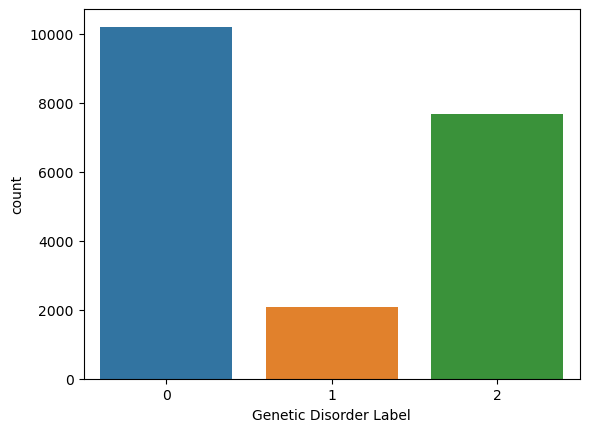

In [12]:
# смотрим распределение y

#train['Genetic Disorder'].value_counts()
sns.countplot(x = "Genetic Disorder Label", data = train)

In [13]:
# разделяем фрейм на X и y и балансируем y

y = train['Genetic Disorder Label']
X = train.drop(['Genetic Disorder Label', 'Genetic Disorder'], axis = 1)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)

(30606, 36)
(30606,)


<AxesSubplot:xlabel='Genetic Disorder Label', ylabel='count'>

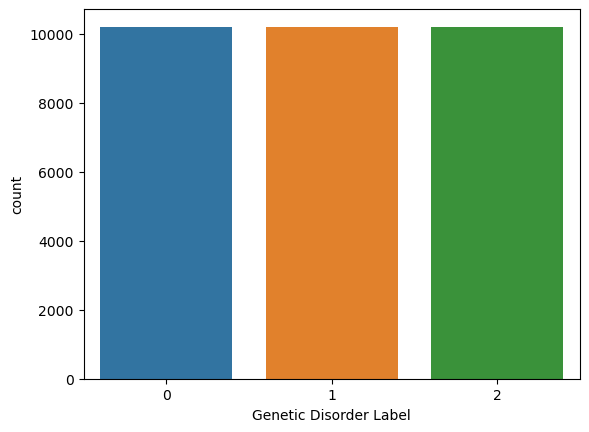

In [33]:
# убеждаемся, что y сбалансировался

sns.countplot(x=y_resampled)

In [15]:
# стандартизируем X

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_resampled)
X_resampled = X_scaler
print(X_resampled.shape)

(30606, 36)


In [53]:
# форматируем массив numpy в pandas dataframe

X_df = pd.DataFrame(data = X_resampled, columns = X.columns)
print(X_df.shape)

(30606, 36)


In [58]:
# сохраняем обработанные выборки X и у для последующей передачи в модель

X_df.to_csv('X.csv', index = False)
y_resampled.to_csv('y.csv', index = False)

#### Создание модели

In [94]:
# импортируем библиотеки

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

##### Импорт предобработанных данных и разделение на выборки

In [4]:
# загружаем Х и у

X = pd.read_csv('C:/Users/rossi/Desktop/mfdp/preprocessing_data/X.csv')
y = pd.read_csv('C:/Users/rossi/Desktop/mfdp/preprocessing_data/y.csv')

# форматируем y в одномерный массив numpy

y = y.to_numpy()
y = y.ravel()

# разделяем на тестовую и обучающую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle = True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21424, 36)
(21424,)
(9182, 36)
(9182,)


##### RandomForestClassifier + Кросс-валидация

In [4]:
rfc_cross = RandomForestClassifier(random_state = 42)

skf = StratifiedKFold(n_splits=10)
cv_score = cross_val_score(rfc_cross, X_train, y_train, 
                           scoring='accuracy', cv=skf, n_jobs=-1)
rfc_cross.fit(X_train, y_train)

print('Точность модели на кросс-валидации: %.3f+-%.3f'% (np.mean(cv_score), np.std(cv_score)))
print('Точность модели на тестовой выборке после кросс валидации: %.3f' % accuracy_score(y_test, rfc_cross.predict(X_test)))

Точность модели на кросс-валидации: 0.765+-0.004
Точность модели на тестовой выборке после кросс валидации: 0.781


In [17]:
# сохраняем модель

pickle.dump(rfc_cross, open('C:/Users/rossi/Desktop/mfdp/models/rfc_cross.pkl','wb'))

##### RandomForestClassifier with GridSearch

In [15]:
parameters_rfc = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 12],
    'min_samples_split': [2, 6, 10],
}

gs_rfc = GridSearchCV(RandomForestClassifier(), parameters_rfc, cv=5, scoring = 'accuracy') 

gs_rfc.fit(X_train, y_train)
best_gs_rfc = gs_rfc.best_estimator_ 
#gs_rfc.best_params_

print('Точность модели на тестовой выборке: %.3f' % accuracy_score(y_test, best_gs_rfc.predict(X_test)))

Точность модели на тестовой выборке: 0.751


In [16]:
# сохраняем модель

pickle.dump(best_gs_rfc, open('C:/Users/rossi/Desktop/mfdp/models/best_gs_rfc.pkl','wb'))

##### GradientBoostingClassifier

In [18]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print('Точность модели на тестовой выборке: %.3f' % accuracy_score(y_test, gbc.predict(X_test)))

Точность модели на тестовой выборке: 0.608


In [19]:
# сохраняем модель

pickle.dump(gbc, open('C:/Users/rossi/Desktop/mfdp/models/gbc.pkl','wb'))

##### GradientBoostingClassifier with RandomSearch

In [20]:
parameters_gbc = {
    #'loss' : ['deviance', 'exponential'],
    #'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
    #'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 6, 10],
}

gs_gbc = RandomizedSearchCV(GradientBoostingClassifier(), parameters_gbc, cv=5, scoring = 'accuracy') 

gs_gbc.fit(X_train, y_train)
best_gs_gbc = gs_gbc.best_estimator_ 
#gs_gbc.best_params_

print('Точность модели на тестовой выборке: %.3f' % accuracy_score(y_test, best_gs_gbc.predict(X_test)))

Точность модели на тестовой выборке: 0.764


In [21]:
# сохраняем модель

pickle.dump(best_gs_gbc, open('C:/Users/rossi/Desktop/mfdp/models/best_gs_gbc.pkl','wb'))

##### Бэггинг

In [22]:
bagging = BaggingClassifier(base_estimator=rfc_cross, random_state=17)
cv_score = cross_val_score(bagging, X_train, y_train, 
                           scoring='accuracy', cv=10, n_jobs=-1)
bagging.fit(X_train, y_train)
print('Точность модели на кросс-валидации: %.3f+-%.3f'% (np.mean(cv_score), np.std(cv_score)))
print('Точность модели на тестовой выборке после кросс валидации: %.3f' % accuracy_score(y_test, bagging.predict(X_test)))

Точность модели на кросс-валидации: 0.761+-0.003
Точность модели на тестовой выборке после кросс валидации: 0.781


In [23]:
# сохраняем модель

pickle.dump(bagging, open('C:/Users/rossi/Desktop/mfdp/models/bagging.pkl','wb'))

##### Стэкинг + кросс-валидация

In [24]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

stacking = StackingClassifier(
    estimators=[('knn', knn), ('tree', tree), ('rfc', rfc)], 
    final_estimator=gbc,
    cv = 10,
    n_jobs=-1
)

cv_score = cross_val_score(stacking, X_train, y_train, 
                           scoring='accuracy', cv=10, n_jobs=-1) 
print('Точность модели на кросс-валидации: %.3f+-%.3f'% (np.mean(cv_score), np.std(cv_score)))

stacking.fit(X_train, y_train)
print('Точность модели на тестовой выборке: %.3f' % accuracy_score(y_test, stacking.predict(X_test)))

Точность модели на кросс-валидации: 0.792+-0.006
Точность модели на тестовой выборке: 0.806


In [25]:
# сохраняем модель

pickle.dump(stacking, open('C:/Users/rossi/Desktop/mfdp/models/stacking.pkl','wb'))

##### AdaBoostClassifier

In [26]:
model_boost = AdaBoostClassifier(DecisionTreeClassifier())
model_boost.fit(X_train, y_train)

print('Точность модели на тестовой выборке: %.3f' % accuracy_score(y_test, model_boost.predict(X_test)))

Точность модели на тестовой выборке: 0.731


In [27]:
# сохраняем модель

pickle.dump(model_boost, open('C:/Users/rossi/Desktop/mfdp/models/model_boost.pkl','wb'))

##### Нейросеть

In [5]:
# импортируем библиотеки

import tensorflow as tf
import keras_tuner
from tensorflow.keras import models, layers
from keras_tuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

##### Ручная архитектура сети

In [18]:
# строим полносвязную нейронную сеть

model_ns = tf.keras.models.Sequential()
model_ns.add(tf.keras.Input(shape=(36,)))
model_ns.add(layers.Dense(units=100, activation="relu"))
model_ns.add(layers.Dropout(0.3))
model_ns.add(Dense(3, input_dim=100, activation='softmax'))

    # к скрытому или входу: activation='tanh', bias_initializer='glorot_normal', kernel_initializer='glorot_normal')) 
    # к скрытому или входу :activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))    
    # к выходу: activation='linear', bias_initializer='he_normal', kernel_initializer='he_normal'))

sgd = SGD(learning_rate=0.01) # momentum=0.9, nesterov=True)
    
model_ns.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    #model_ns.compile(
    #optimizer=tf.keras.optimizers.Adam(0.001),
    #optimizer=tf.optimizers.Adam(learning_rate=0.1),
    #optimizer=sgd,
    #loss='mean_absolute_error')
    #rmsprop, adagrad

model_ns.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               3700      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 303       
                                                                 
Total params: 4,003
Trainable params: 4,003
Non-trainable params: 0
_________________________________________________________________


In [19]:
%%time
history_ns = model_ns.fit(
    X_train,
    to_categorical(y_train),
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: total: 3min 6s
Wall time: 2min 32s


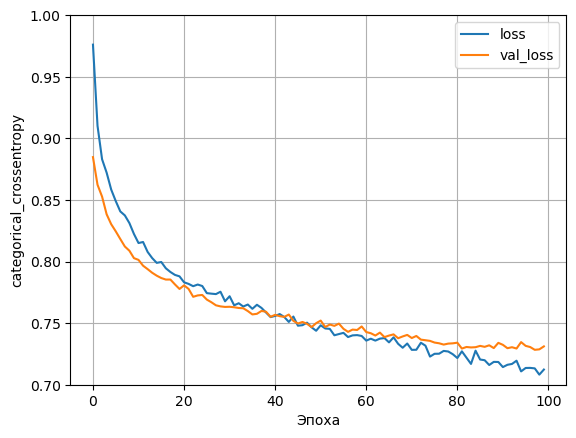

In [20]:
# отрисовываем график функции потерь

def plot_loss_ns(history_ns):
    plt.plot(history_ns.history['loss'], label='loss')
    plt.plot(history_ns.history['val_loss'], label='val_loss')
    plt.ylim([0.7,1])
    plt.xlabel('Эпоха')
    plt.ylabel('categorical_crossentropy')
    plt.legend()
    plt.grid(True)
    
plot_loss_ns(history_ns)

In [26]:
# оцениваем модель

model_ns.evaluate(
  X_test, 
  to_categorical(y_test) 
)

287/287 [==============================] - 2s 3ms/step - loss: 0.7390 - accuracy: 0.6680


[0.7389727830886841, 0.6680461764335632]

In [27]:
# то же самое

accuracy_score(y_test, (np.argmax(model_ns.predict(X_test),axis=1)))

287/287 [==============================] - 1s 3ms/step


0.6680461773034198

In [69]:
# сохраняем модель

pickle.dump(model_ns, open('C:/Users/rossi/Desktop/mfdp/models/model_ns.pkl','wb'))

INFO:tensorflow:Assets written to: ram://0d6d927b-bfa2-419a-9040-b9764905ba66/assets


In [16]:
# передаем модели последние 10 сэмплов тестовой выборки
pred = model_ns.predict(X_test[-10:])

# выведем предсказание

print('Предсказание:', np.argmax(pred, axis = 1))
 
# сравним с целевой переменной

print('Истинные значения:', y_test[-10:])

1/1 [==============================] - 0s 25ms/step
Предсказание: [0 0 0 2 0 2 1 1 0 1]
Истинные значения: [0 0 2 2 0 1 2 2 1 1]


In [25]:
# сохраняем модель

model_path_1 = "C:/Users/rossi/Desktop/mfdp/models/model_ns"
model_ns.save(model_path_1)

INFO:tensorflow:Assets written to: C:/Users/rossi/Desktop/mfdp/models/model_ns\assets


##### Keras Tuner

In [46]:
# задаем тюнер архитектуры сети

def tuner_model(hp):
    model = Sequential()
    
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu', 'softmax']) 
                
# сетка параметров входного слоя
    
    model.add(Dense(units=hp.Int('units_input',    
                                   min_value=12,   
                                   max_value=36,  
                                   step=2),
                                   input_dim = X_train.shape[1], #input_shape=(X3_train.shape[1])
                                   activation = activation_choice))
    
# сетка кол-ва слоев и их параметров:

    for i in range(hp.Int('num_layers', 2, 6)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=72,
                                            max_value=288,
                                            step=36),
                                            activation = activation_choice))
# выходной слой

    model.add(Dense(3, activation='softmax'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD', 'adagrad']),
        loss='categorical_crossentropy',
        metrics=['accuracy'])   
    
    return model
'''
#сетка параметров скрытого слоя
    
    #model.add(Dense(units=hp.Int('units_hidden',        
                                   #min_value=12,   
                                   #max_value=64,   
                                   #step=2),
                    #activation=activation_choice))
    
# cетка параметров дропаут слоя
    
    #model.add(layers.Dropout(hp.Float('dropout',
                                       #min_value=0.0,
                                       #max_value=0.5,
                                       #step=0.5)))


# сетка параметров конкретного оптимайзера
    
    #model.compile(
        #optimizer=keras.optimizers.Adam(
            #hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))
'''

"\n#сетка параметров скрытого слоя\n    \n    #model.add(Dense(units=hp.Int('units_hidden',        \n                                   #min_value=12,   \n                                   #max_value=64,   \n                                   #step=2),\n                    #activation=activation_choice))\n    \n# cетка параметров дропаут слоя\n    \n    #model.add(layers.Dropout(hp.Float('dropout',\n                                       #min_value=0.0,\n                                       #max_value=0.5,\n                                       #step=0.5)))\n\n\n# сетка параметров конкретного оптимайзера\n    \n    #model.compile(\n        #optimizer=keras.optimizers.Adam(\n            #hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))\n"

In [47]:
# создаем модель

tuner = RandomSearch(
            tuner_model, 
            objective='accuracy', #метрика, которую нужно оптимизировать
            #seed=42,
            max_trials=5) # кол-во создаваемых моделей

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [48]:
# выводим все возможные параметры

tuner.search_space_summary()

Search space summary
Default search space size: 9
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu', 'softmax'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 12, 'max_value': 36, 'step': 2, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 48, 'max_value': 128, 'step': 12, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 48, 'max_value': 128, 'step': 12, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 48, 'max_value': 128, 'step': 12, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 48, 'max_value': 128, 'step': 12, 'sampling': None}
units

In [49]:
# тренируем модель

tuner.search(X_train, to_categorical(y_train), epochs=100, validation_split=0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [50]:
# оцениваем модель

best_model = tuner.get_best_models(num_models=1)[0] #полуаем лучшую модель
best_model.evaluate(
  X_test, 
  to_categorical(y_test) 
)

287/287 [==============================] - 2s 4ms/step - loss: 1.8355 - accuracy: 0.7336


[1.8354930877685547, 0.7336092591285706]

In [51]:
# архитектура лучшей модели

best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1110      
                                                                 
 dense_1 (Dense)             (None, 108)               3348      
                                                                 
 dense_2 (Dense)             (None, 96)                10464     
                                                                 
 dense_3 (Dense)             (None, 60)                5820      
                                                                 
 dense_4 (Dense)             (None, 96)                5856      
                                                                 
 dense_5 (Dense)             (None, 48)                4656      
                                                                 
 dense_6 (Dense)             (None, 3)                 1

In [52]:
# сохраняем модель

model_path_2 = "C:/Users/rossi/Desktop/mfdp/models/best_model"
best_model.save(model_path_2)

INFO:tensorflow:Assets written to: C:/Users/rossi/Desktop/mfdp/models/best_model\assets


#### Метрики

In [53]:
# загружаем ранее сохраненные модели

loaded_rfc_cross = pickle.load(open('C:/Users/rossi/Desktop/mfdp/models/rfc_cross.pkl', 'rb'))
loaded_bagging = pickle.load(open('C:/Users/rossi/Desktop/mfdp/models/bagging.pkl', 'rb'))
loaded_best_gs_gfc = pickle.load(open('C:/Users/rossi/Desktop/mfdp/models/best_gs_gbc.pkl', 'rb'))
loaded_best_gs_rfc = pickle.load(open('C:/Users/rossi/Desktop/mfdp/models/best_gs_rfc.pkl', 'rb'))
loaded_gbc = pickle.load(open('C:/Users/rossi/Desktop/mfdp/models/gbc.pkl', 'rb'))
loaded_model_boost = pickle.load(open('C:/Users/rossi/Desktop/mfdp/models/model_boost.pkl', 'rb'))
loaded_stacking = pickle.load(open('C:/Users/rossi/Desktop/mfdp/models/stacking.pkl', 'rb'))

# модели нейросетей
model_path_1 = "C:/Users/rossi/Desktop/mfdp/models/model_ns"
model_path_2 = "C:/Users/rossi/Desktop/mfdp/models/best_model"
loaded_model_ns = keras.models.load_model(model_path_1)
loaded_best_model = keras.models.load_model(model_path_2)

In [85]:
# бенчмаркинг результативности моделей

models = [loaded_best_gs_gfc, # RandomForestClassifier with GridSearch
          loaded_gbc, # GradientBoostingClassifier
          loaded_best_gs_gfc, # GradientBoostingClassifier with RandomSearch
          loaded_rfc_cross, # RandomForestClassifier + Кросс-валидация
          loaded_bagging, # Bagging
          loaded_stacking, # Stecking
          loaded_model_boost, # AdaBoostClassifier
          loaded_model_ns, # нейронка
          loaded_best_model # нейронка Keras Tuner
        ]

for model in models:
    if model == loaded_best_model or model == loaded_model_ns:
        print(model.__class__.__name__)
        print('Точность нейронки на тестовой выборке: %.3f' % accuracy_score(y_test, (np.argmax(model.predict(X_test),axis=1))))
    else:
        print(model.__class__.__name__)
        print('Точность модели на тестовой выборке: %.3f' % accuracy_score(y_test, model.predict(X_test)))

GradientBoostingClassifier
Точность модели на тестовой выборке: 0.764
GradientBoostingClassifier
Точность модели на тестовой выборке: 0.608
GradientBoostingClassifier
Точность модели на тестовой выборке: 0.764
RandomForestClassifier
Точность модели на тестовой выборке: 0.781
BaggingClassifier
Точность модели на тестовой выборке: 0.781
StackingClassifier
Точность модели на тестовой выборке: 0.806
AdaBoostClassifier
Точность модели на тестовой выборке: 0.731
Sequential
287/287 [==============================] - 1s 3ms/step
Точность нейронки на тестовой выборке: 0.668
Sequential
287/287 [==============================] - 1s 3ms/step
Точность нейронки на тестовой выборке: 0.734


In [86]:
# метрики для лучшей модели

print(classification_report(y_test, loaded_stacking.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      3028
           1       0.99      0.97      0.98      3067
           2       0.76      0.63      0.69      3087

    accuracy                           0.81      9182
   macro avg       0.81      0.81      0.81      9182
weighted avg       0.81      0.81      0.81      9182



In [87]:
# матрица ошибок дл каждого класса отдельно по отношению к остальным классам

import sklearn.metrics
r = sklearn.metrics.multilabel_confusion_matrix(y_test, loaded_stacking.predict(X_test), labels=[0, 1, 2])
print(r)

[[[4993 1161]
  [ 543 2485]]

 [[6092   23]
  [  97 2970]]

 [[5497  598]
  [1142 1945]]]


Text(0.5, 0, 'Предсказанные значения')

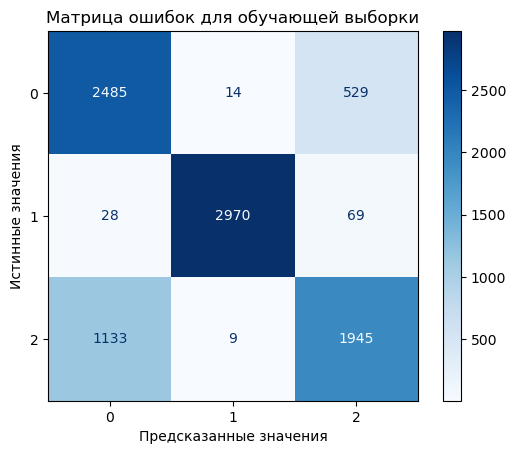

In [88]:
# матрица ошибок

display = ConfusionMatrixDisplay.from_estimator(
    loaded_stacking,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)
display.ax_.set_title('Матрица ошибок для обучающей выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')

In [89]:
# roc_auc score

y_train_predicted_stacking = loaded_stacking.predict_proba(X_train)
y_test_predicted_stacking = loaded_stacking.predict_proba(X_test)

roc_train_stacking = roc_auc_score(y_train, y_train_predicted_stacking, multi_class='ovr')
roc_test_stacking = roc_auc_score(y_test, y_test_predicted_stacking, multi_class='ovr')

print(f"ROC AUC на обучающей {roc_train_stacking}")
print(f"ROC AUC на тестовой {roc_test_stacking}")

ROC AUC на обучающей 0.9963262372608458
ROC AUC на тестовой 0.9292014450959248
